In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Basic

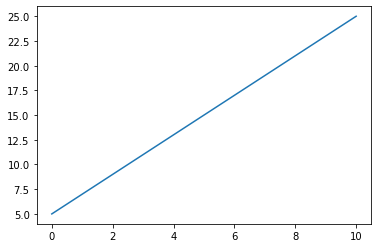

In [2]:
x = np.linspace(0, 10, 100)
y = 2 * x + 5
plt.plot(x, y)
plt.show()

# Bar graph

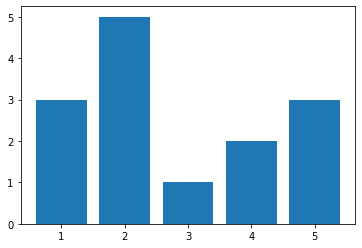

In [3]:
v = [3, 5, 1, 2, 3]
x = np.arange(len(v)) + 1
plt.bar(x, v)
plt.show()

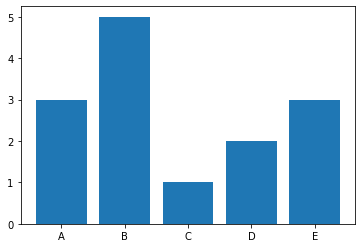

In [4]:
v = [3, 5, 1, 2, 3]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v, tick_label=labels, align='center')
plt.show()

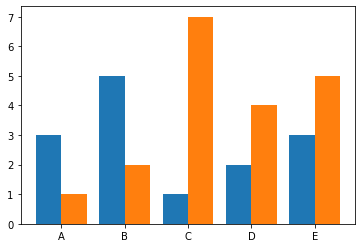

In [5]:
v1 = [3, 5, 1, 2, 3]
v2 = [1, 2, 7, 4, 5]

x = np.arange(len(v1)) + 1
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v1, align='center', width=w)
plt.bar(x+w, v2, align='center', width=w)
plt.xticks(x + w/2, labels)
plt.show()

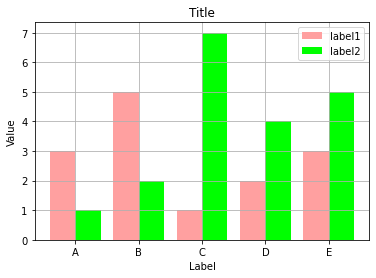

In [6]:
v1 = [3, 5, 1, 2, 3]
v2 = [1, 2, 7, 4, 5]

x = np.arange(len(v1)) + 1
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v1, align='center', width=w, color='#FFA0A0', label='label1')
plt.bar(x+w, v2, align='center', width=w, color='#00FF00', label='label2')
plt.xticks(x + w/2, labels)
plt.legend()
plt.title("Title")
plt.xlabel("Label")
plt.ylabel("Value")
plt.grid(True)
plt.show()

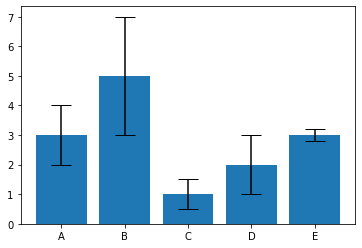

In [7]:
v = [3, 5, 1, 2, 3]
e = [1, 2, .5, 1, .2]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v, yerr=e, capsize=10, tick_label=labels, align='center')
plt.show()

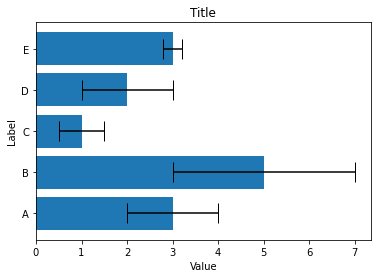

In [8]:
v = [3, 5, 1, 2, 3]
e = [1, 2, .5, 1, .2]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.barh(x, v, xerr=e, capsize=10, tick_label=labels, align='center')
plt.title("Title")
plt.ylabel("Label")
plt.xlabel("Value")
plt.show()

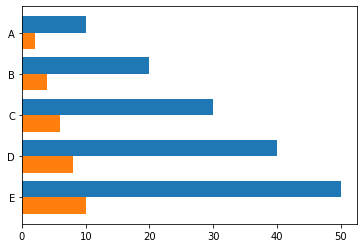

In [9]:
x = np.arange(5) + 1
v1 = np.linspace(10,50, 5)
v2 = x * 2
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']

# Reverse
x = x[::-1]

# Show
plt.barh(x, v1, align='center', height=w)
plt.barh(x-w, v2, align='center', height=w)
plt.yticks(x - w/2, labels)
plt.show()

# Scatter

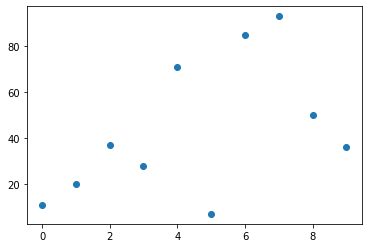

In [10]:
x = np.arange(10)
y = np.random.randint(0, 100, 10)
plt.scatter(x, y)

10.04025315386607 6.879525046332217


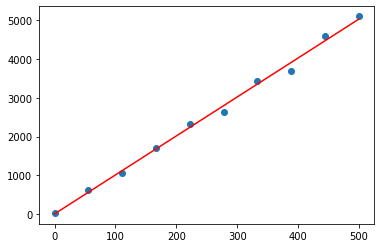

In [11]:
x = np.linspace(0, 500, 10)
y = 10 * (x + np.random.randn(10)*10) + np.random.normal(10, 20, 10)
a, b = np.polyfit(x, y, 1)
print(a, b)
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')

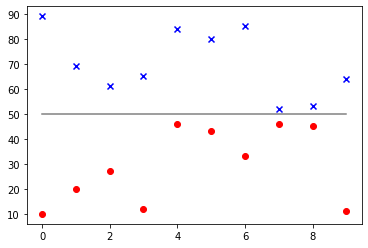

In [12]:
x = np.arange(10)
y1 = np.random.randint(0, 50, 10)
y2 = np.random.randint(50, 100, 10)
plt.scatter(x, y1, color='red', marker='o')
plt.scatter(x, y2, color='blue', marker='x')

y3 = np.ones(10) * 50
plt.plot(x, y3, color='gray')

# Graph that x-axis is date time

In [13]:
import pandas as pd
df = pd.read_csv(
    "temperature.csv", 
    usecols=[0,1],
    skiprows=5, 
    header=None, 
    names=("Date", "Temperature")
)

df.head()

,Date,Temperature
0,2022/6/22 1:00:00,21.6
1,2022/6/22 2:00:00,21.6
2,2022/6/22 3:00:00,21.6
3,2022/6/22 4:00:00,21.6
4,2022/6/22 5:00:00,21.4


In [14]:
# Convert date string to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d %H:%M:%S")
df.head()

,Date,Temperature
0,2022-06-22 01:00:00,21.6
1,2022-06-22 02:00:00,21.6
2,2022-06-22 03:00:00,21.6
3,2022-06-22 04:00:00,21.6
4,2022-06-22 05:00:00,21.4


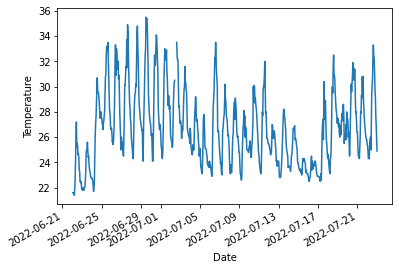

In [15]:
import matplotlib.dates as mdates
def plot():
    plt.plot(df["Date"], df["Temperature"])
    plt.xlabel("Date")
    plt.ylabel("Temperature")

plot()
plt.gcf().autofmt_xdate() 

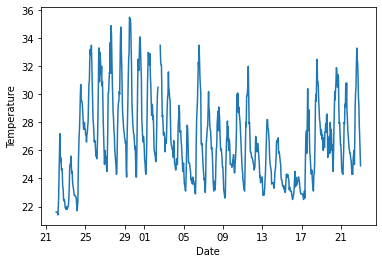

In [16]:
plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

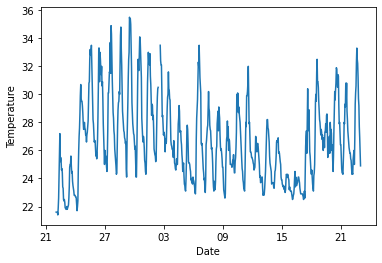

In [17]:
plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))

# Layout (figure, axes)

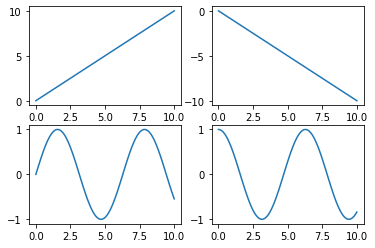

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(6, 4))

x = np.linspace(0, 10, 100)
y1 = x
y2 = -x
y3 = np.sin(x)
y4 = np.cos(x)

ax[0, 0].plot(x, y1)
ax[0, 1].plot(x, y2)
ax[1, 0].plot(x, y3)
ax[1, 1].plot(x, y4)

# Export

### Export to html file


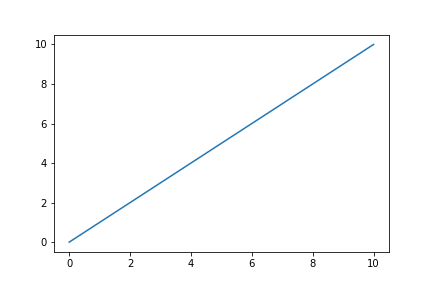

In [19]:
from IPython.display import HTML

import base64
import io


def to_html(fig, fmt='png'):
    with io.BytesIO() as f:
        fig.savefig(f, format=fmt)
        encoded = base64.b64encode(f.getvalue()).decode('utf-8')
    html = f'<img src=\'data:image/{fmt};base64,{encoded}\'>'
    return html


fig, ax = plt.subplots()
x = y = np.linspace(0, 10, 100)
ax.plot(x, y)
body = to_html(fig)
plt.close()

HTML(f'<html><body>{body}</body></html>')